# 01. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option shall ensure that the graphs created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

# 02. Importing Data

In [3]:
# Project folder

path = r'C:\Users\peter\Documents\Berlin AirBnB'

In [4]:
path

'C:\\Users\\peter\\Documents\\Berlin AirBnB'

In [5]:
# Importing cleaned dataset

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Berlin AirBnB_clean_2.csv'))

In [6]:
df.shape

(16265, 16)

In [7]:
df.head()

,Unnamed: 0,id,host_id,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_365,num_reviews_ltm,price_category
0,0,4.021868e+07,39450649,Pankow,Buch,52.63136,13.51879,Entire home/apt,51,1,11,0.40,21,345,8,middle_price
1,1,3.784921e+07,286623313,Tempelhof - Schöneberg,Lichtenrade,52.37272,13.41607,Entire home/apt,40,28,2,0.07,1,352,0,middle_price
2,2,4.021881e+07,39450649,Pankow,Buch,52.63136,13.51879,Entire home/apt,87,1,3,0.16,21,304,2,high_price
3,3,3.243150e+07,243598169,Spandau,Falkenhagener Feld,52.55720,13.14205,Entire home/apt,55,3,16,0.43,1,215,5,middle_price
4,4,5.468740e+17,156670608,Spandau,Gatow / Kladow,52.45472,13.10890,Entire home/apt,90,3,4,2.55,1,251,4,high_price


In [8]:
### Dropping all categorical variables as we'll be running a k-means test as well as Unnamed column ####  

df = df.drop(["Unnamed: 0", "neighborhood_group", "neighborhood", 'room_type', 'price_category'], axis= 1)

In [9]:
df.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_365,num_reviews_ltm
0,4.021868e+07,39450649,52.63136,13.51879,51,1,11,0.40,21,345,8
1,3.784921e+07,286623313,52.37272,13.41607,40,28,2,0.07,1,352,0
2,4.021881e+07,39450649,52.63136,13.51879,87,1,3,0.16,21,304,2
3,3.243150e+07,243598169,52.55720,13.14205,55,3,16,0.43,1,215,5
4,5.468740e+17,156670608,52.45472,13.10890,90,3,4,2.55,1,251,4


In [10]:
#Removing unnecessary variables such as id and host_id, which should not impact price of rentals but are meerly identifiers

In [11]:
df = df.drop(['id', 'host_id'], axis = 1)

In [12]:
#Testing removal of lat/long from DF and elbow/z-test

df = df.drop(['latitude', 'longitude'], axis = 1)

In [13]:
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_365,num_reviews_ltm
0,51,1,11,0.40,21,345,8
1,40,28,2,0.07,1,352,0
2,87,1,3,0.16,21,304,2
3,55,3,16,0.43,1,215,5
4,90,3,4,2.55,1,251,4


# 03. The Elbow Technique

In [14]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-311735159.7814632,
 -123359287.47569454,
 -96680079.4788566,
 -80888616.32468595,
 -71383187.91137895,
 -63288354.905657515,
 -56460236.067299366,
 -51019541.28132885,
 -46174724.43278251]

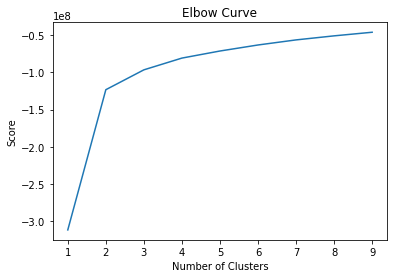

In [16]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Based on the above results, I would say the optimal count for my clusters is either 3 or 4, because afterwards the line starts to being to flatten out

# 04. K-means clustering

In [17]:
# Creating k-means object using 4 clusters. 

kmeans = KMeans(n_clusters = 4, n_jobs = -1) 


In [18]:
# Fitting the k-means object to the data.

kmeans.fit(df)

C:\Users\peter\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

In [19]:
df['clusters'] = kmeans.fit_predict(df)

C:\Users\peter\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [20]:
df.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_365,num_reviews_ltm,clusters
0,51,1,11,0.40,21,345,8,1
1,40,28,2,0.07,1,352,0,1
2,87,1,3,0.16,21,304,2,1
3,55,3,16,0.43,1,215,5,0
4,90,3,4,2.55,1,251,4,1


In [21]:
df['clusters'].value_counts()

2    10960
1     2614
0     2102
3      589
Name: clusters, dtype: int64

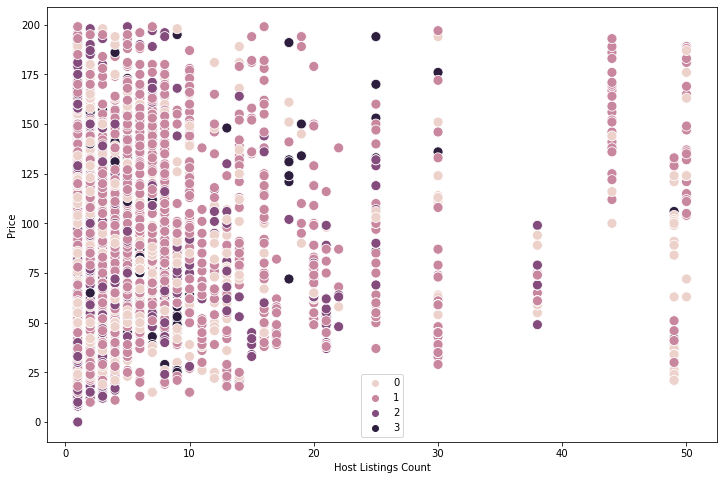

In [22]:
# Plotting the clusters for the "price" and "host_listings_count" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['host_listings_count'], y=df['price'], hue=kmeans.labels_, s=100) 
# Subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Host Listings Count') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### Based on the above results, it is clear that the number of host listings and the price of the rentals per night varies greatly all across the board. This means some hosts have maybe 1-5 listings, but the prices range greatly. Alternatively, some hosts may have over 40 or close to 50 listings, but the price ranges from low to high. The most interesting range may be around less than 40, around 38. It appears that hosts who have around 38 listings, tend to be more in the low to mid-range prices for rentals on AirBnB. 

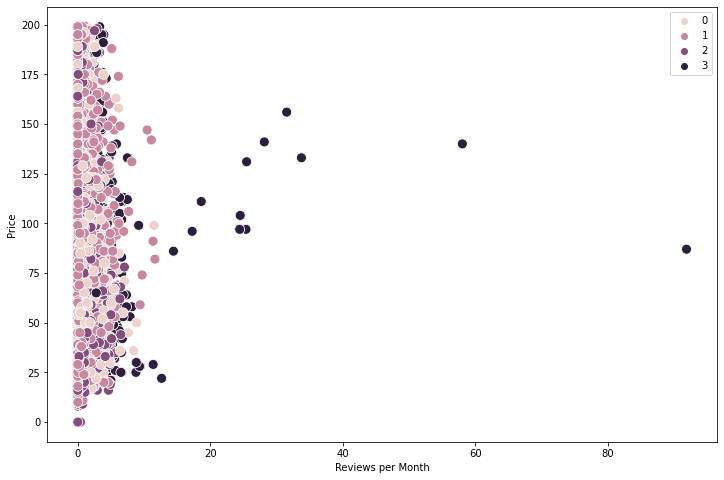

In [23]:
# Plotting the clusters for the "price" and "reviews_per_month" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['reviews_per_month'], y=df['price'], hue=kmeans.labels_, s=100) 
# Subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Reviews per Month') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### Based on these findings, it is pretty inconclusive as there is again a lot of variaton all acrosst he board. We can however definitively say that regardless of price, the number of reviews per month for each listing generally is somewhere between 0-10. There are a few outliers where reviews per month exceed 20+, and they appear to all be within the mid to upper price range of rentals on AirBnB. 

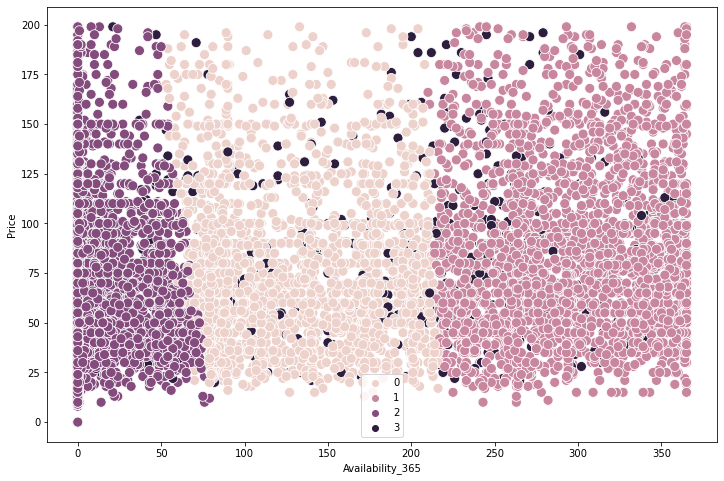

In [24]:
# Plotting the clusters for the "price" and "availability_365" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['availability_365'], y=df['price'], hue=kmeans.labels_, s=100) 
# Subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Availability_365') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### The above findings show that the availability of a rental does not impact the price. Rather, regardless whether the rental is available for less than 50, or between 75 and 225 days, or between 225 and 365 days, the price ranges can be anywhere from 10 to 200 EUR per night. As such, we can definitively say that availability of rentals does not impact the price of a rental on AirBnB. 

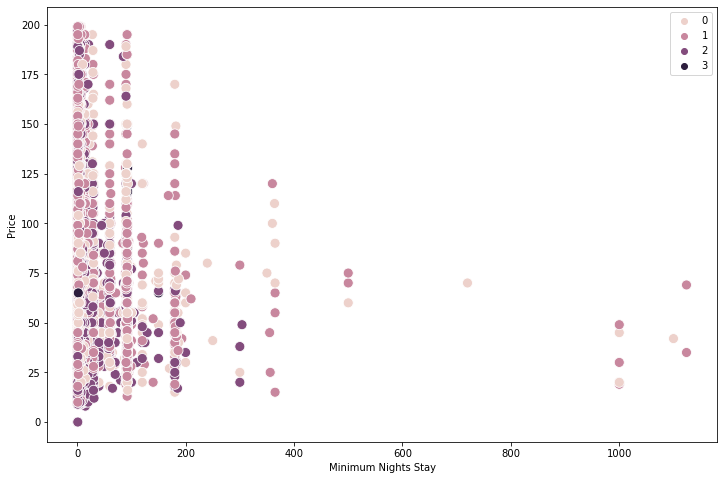

In [25]:
# Plotting the clusters for the "price" and "minimum_nights" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['minimum_nights'], y=df['price'], hue=kmeans.labels_, s=100) 
# Subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Minimum Nights Stay') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

### The the minimum_nights stay at rentals does not appear to impact the price overall. Generally, the price ranges are also very mixed. This highlights that in Berlin, there is a broad variety of rentals that require minimum nights stay at a broad range of prices - lower, mid, and upper end regardless of how long you stay. There are of course several significant outliers that requrie a minimum nights stay of over 365 days, which are likely long-term rentals being advertised via AirBnB as opposed to traditional apartment rental websites such as ImmoScout or Immobilien24.de. Hence, these are different than typical short-term overnight stays but rather are almost like real long-term rental contracts. Hence why the price of these locations may be around 25-50 EUR per night for long-term rentals. For example, the price of such a rental of 1000 days (circa 2.5 years) would mean a monthly rent of between 750 to 1500 for an apartment. Nonetheless, these are observations that are outliers and do not pertain to normal overnight/short-term stays when visiting a city. 

In [26]:
df.loc[df['clusters'] == 3, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 2, 'cluster'] = 'purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'pink'
df.loc[df['clusters'] == 0, 'cluster'] = 'light pink'

In [27]:
df.groupby('cluster').agg({'host_listings_count':['mean', 'median'], 
                         'reviews_per_month':['mean', 'median'], 
                         'availability_365':['mean', 'median'],
                          'price':['mean', 'median']})

host_listings_count        reviews_per_month         \
                           mean median              mean median   
cluster                                                           
dark purple            3.850594    2.0          4.040255   3.17   
light pink             4.492388    1.0          0.758635   0.40   
pink                   6.563122    3.0          0.795249   0.35   
purple                 1.429745    1.0          0.279243   0.09   

            availability_365             price         
                        mean median       mean median  
cluster                                                
dark purple       155.324278  158.0  77.792869   69.0  
light pink        131.286870  129.0  76.476213   69.0  
pink              297.259373  296.5  84.611706   77.0  
purple              4.221168    0.0  55.641150   48.0

### Summary of clusters

Based on the above cluster results, dark purple and pink seem to have the best stats in a variety of categories. The median as well as the mean regarding the number of host listings is highest under pink. However, the mean and median for the reviews_per_month is largest under dark purple. The availability_365 as well as price is highest under the pink clusters. 

When comparing clusters with one another under each variable, it appears that there is a significant level of variety between each other. One noticeable, seemingly error, is that the price of the purple cluster has a median of 0, which would indicate that there is at least one rental in AirBnB for rent that has a price of 0 in that dataframe. 

This could either be an error in entry or there is also a possibility that someone advertised their apartment/house/etc for 0 EUR to get more entries and/or maybe that host was offering a swap or free rental in exchange for something other than money/cash, i.e. an evening out, a wine, etc. While this may seem a bit strange, there are similar websites like couchsurfing where such overnight stays may be offered for "free" in the exchange of something other than cash. 